In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('top10K-TMDB-movies.csv')

In [8]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [9]:
df.shape

(10000, 9)

In [10]:
df.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [12]:
df.tail()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


## DATA TRANSFORMATION
1. check for missing values
2. check for duplicates 

In [13]:
df.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [14]:
df.dropna(subset=['genre','overview'], inplace=True)

In [15]:
df.isnull().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [16]:
df.duplicated().sum()

0

## DATA ANALYSIS
Data analysis is a huge topic and requires extensive study to master. However, there are four major types of analysis:

    a) Descriptive analysis uses previous data to explain what’s happened in the past. Common examples include identifying sales trends or your customers’ behaviors.
    b) Diagnostic analysis tries to find out why those events have happened. For example, why did the sales trend occur? And why exactly did your customers do what they did?
    c) Predictive analysis uses techniques to try and predict what might happen in the future. For example, what do you expect future sales trends to do? Or what do you expect your customers to do next?
    d) Prescriptive analysis takes everything discovered by the earlier analysis types and uses that information to formulate a future strategy. For example, you might want to implement measures to prevent sales trend predictions from falling or to prevent your customers from purchasing elsewhere.

In this section we will analysis the data and answer a couple of question that helps us analyse the movies on Netflix. We'll have to do some feature engineering by creating new columns such as release year to assist in the analysis. Some of the questions we are looking to answer are:
1. popular original language
2. popular categor of movies made
3. popular category of movies based on vote_average 
4. when most movies were released
5. movies added in the last 5 years

In [17]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [18]:
df1 = pd.DataFrame(df)
df1.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [19]:
#which are the original languages that the movies are produced in
languages = df['original_language'].unique()
print(languages, 'Total languages:', len(languages))


{'el', 'th', 'fr', 'uk', 'no', 'pt', 'pl', 'tr', 'zh', 'ja', 'fa', 'te', 'he', 'sr', 'id', 'nb', 'ko', 'ar', 'hu', 'bs', 'es', 'et', 'cn', 'af', 'sv', 'ru', 'fi', 'cs', 'hi', 'eu', 'is', 'de', 'ro', 'xx', 'ml', 'bn', 'la', 'nl', 'da', 'ab', 'it', 'en', 'sh'} Total languages: 43
['en' 'hi' 'es' 'ja' 'ko' 'it' 'pt' 'ru' 'zh' 'fr' 'tr' 'sv' 'ar' 'de'
 'bn' 'cn' 'da' 'nl' 'th' 'fa' 'hu' 'pl' 'sh' 'sr' 'et' 'id' 'no' 'cs'
 'te' 'ro' 'bs' 'el' 'fi' 'is' 'ml' 'la' 'af' 'uk' 'eu' 'nb' 'he' 'ab'
 'xx'] Total languages: 43


In [69]:
#most_common language based on amount of movies
common_language = df.groupby('original_language').size()
common_language = common_language.sort_values(ascending=False)
common_language.head()
top_language = common_language[1:10]
print(top_language)

original_language
fr    1406
ja     909
it     722
es     408
de     240
ko     216
cn     162
zh     157
ru     123
dtype: int64


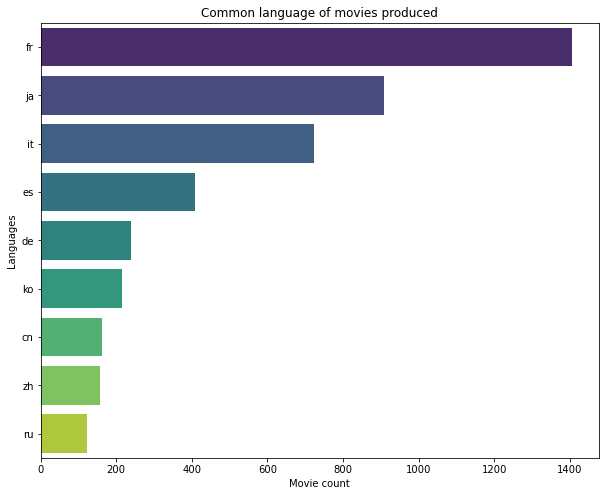

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10,8))
sns.barplot(x=top_language.values, y=top_language.index, palette="viridis")
plt.title('Common language of movies produced')
plt.xlabel('Movie count')
plt.ylabel('Languages')
plt.show()

In [42]:
#popular category based to popularity
#there are movis that lie in more than one genre thus the genre category needs to be split into UNNEST(SPLIT_TO_ARRAY)
df['category'] = df['genre'].str.split(',')
df = df.explode('category')
df.head(10)
#change the popularity to 1 decimal place
df['popularity'] = df['popularity'].round(1)
#rank the highest popular category/genre based on popularity
popular_popularity= df.groupby('category')['popularity'].mean()
popular_popularity = popular_popularity.sort_values('popularity', ascending=False)
print(popular_popularity)

ValueError: No axis named popularity for object type Series

In [5]:
import matplotlib.pyplot as plt

NameError: name 'count' is not defined